## Text Extraction

---



In [ ]:
#***** Recommend using high ram *****

!sudo apt install tesseract-ocr -y
!pip install pytesseract
!apt-get install poppler-utils -y
!pip install pdf2image
!pip install tqdm
!pip install pandas tqdm

import os
from pdf2image import convert_from_path
import pytesseract
from tqdm.auto import tqdm
import pandas as pd
import json

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,890 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
# Directory containing PDFs in Google Drive
pdf_dir = '/content/drive/MyDrive/Pol Project/NSS'

texts_by_year = {}

pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith('.pdf')]

for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
    year = pdf_file.split('.')[0]
    images = convert_from_path(os.path.join(pdf_dir, pdf_file))
    all_text = ''

    for img in tqdm(images, desc=f"Year: {year}", leave=False):
        text = pytesseract.image_to_string(img)
        all_text += text + '\n'

    texts_by_year[year] = all_text

df = pd.DataFrame(list(texts_by_year.items()), columns=['Year', 'Text'])

df.head()

Processing PDFs:   0%|          | 0/18 [00:00<?, ?it/s]

Year: 2022:   0%|          | 0/48 [00:00<?, ?it/s]

Year: 2010:   0%|          | 0/60 [00:00<?, ?it/s]

Year: 2015:   0%|          | 0/35 [00:00<?, ?it/s]

Year: 2017:   0%|          | 0/68 [00:00<?, ?it/s]

Year: 1987:   0%|          | 0/41 [00:00<?, ?it/s]

Year: 1988:   0%|          | 0/48 [00:00<?, ?it/s]

Year: 1990:   0%|          | 0/34 [00:00<?, ?it/s]

Year: 1991:   0%|          | 0/37 [00:00<?, ?it/s]

Year: 1993:   0%|          | 0/26 [00:00<?, ?it/s]

Year: 1994:   0%|          | 0/31 [00:00<?, ?it/s]

Year: 1995:   0%|          | 0/41 [00:00<?, ?it/s]

Year: 1996:   0%|          | 0/50 [00:00<?, ?it/s]

Year: 1997:   0%|          | 0/34 [00:00<?, ?it/s]

Year: 1998:   0%|          | 0/61 [00:00<?, ?it/s]

Year: 1999:   0%|          | 0/52 [00:00<?, ?it/s]

Year: 2000:   0%|          | 0/84 [00:00<?, ?it/s]

Year: 2002:   0%|          | 0/35 [00:00<?, ?it/s]

Year: 2006:   0%|          | 0/54 [00:00<?, ?it/s]

Year                                               Text
0  2022   \n\nv\na\nx\nNATIONAL\nSECURITY\nVUE eS\n\n \...
1  2010  NATIONAL SECURITY\nSTRATEGY\n\nMay 2010\n\n \n...
2  2015  NATIONAL SECURITY\nSTRATEGY\n\nFEBRUARY 2015\n...
3  2017  NATIONAL SECURITY\nSTRATEGY\n\nof the United S...
4  1987  NATIONAL\nSECURITY\nSTRATEGY\n\nOF THE\nUNITED...

## Country Tagging

---



In [ ]:
!pip install pycountry-convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import pycountry
from collections import Counter
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 1.1 MB/s eta 0:00:00


In [ ]:
#Using the list from pycountry with custom addition to account for historical names
countries = [country.name for country in pycountry.countries] + ['Soviet', 'USSR', 'Persia', 'East Germany', 'West Germany', 'Russia', 'North Korea', 'South Korea', 'Taiwan','Iran','Tanzania', 'Venezuela']

def clean_text(text):
    return re.sub(r'\s+', ' ', text)

# Function to find country counts
def analyze_text_in_df(df):
    # Define a function to count countries in text
    def count_countries(text):
        text = clean_text(text)
        country_counts = Counter({country: len(re.findall(r'\b' + re.escape(country) + r'\b', text, flags=re.IGNORECASE))
                                 for country in countries if re.search(r'\b' + re.escape(country) + r'\b', text, flags=re.IGNORECASE)})
        return dict(country_counts)

    # Apply the count function to each row in 'Text' column
    df['Country_counts'] = df['Text'].apply(count_countries)
    return df

result_df = analyze_text_in_df(df)
result_df.head()

Year                                               Text  \
0  2022   \n\nv\na\nx\nNATIONAL\nSECURITY\nVUE eS\n\n \...   
1  2010  NATIONAL SECURITY\nSTRATEGY\n\nMay 2010\n\n \n...   
2  2015  NATIONAL SECURITY\nSTRATEGY\n\nFEBRUARY 2015\n...   
3  2017  NATIONAL SECURITY\nSTRATEGY\n\nof the United S...   
4  1987  NATIONAL\nSECURITY\nSTRATEGY\n\nOF THE\nUNITED...   

                                      Country_counts  
0  {'Afghanistan': 4, 'Argentina': 1, 'Antarctica...  
1  {'Afghanistan': 21, 'Argentina': 1, 'Australia...  
2  {'Afghanistan': 10, 'Australia': 2, 'Brazil': ...  
3  {'Afghanistan': 5, 'Australia': 3, 'Belgium': ...  
4  {'Afghanistan': 3, 'Angola': 1, 'Australia': 1...

In [ ]:
#*** Checking with a small sample ***

# Create a new subset from the first row of the 'Country_counts'
first_row_data = result_df.loc[10, 'Country_counts']
country_counts_df = pd.DataFrame(list(first_row_data.items()), columns=['Country', 'Count'])

first_text = df['Text'].iloc[10]
first_text = clean_text(first_text)

# Step 2: Count occurrences of each country in the paragraph
country_counts = Counter({country: len(re.findall(r'\b' + re.escape(country) + r'\b', first_text, flags=re.IGNORECASE))
                          for country in countries if re.search(r'\b' + re.escape(country) + r'\b', first_text, flags=re.IGNORECASE)})

# Step 3: Create a df from the subset
country_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Count'])

# **Checking for a Match**

# 1. Ensure the 'country' columns match
if not country_df['Country'].equals(country_counts_df['Country']):
    print("The test prototype does not match with the excerpt from the whole database (country lists differ)")
    exit()  # Stop execution if countries don't align

# 2. Compare the other columns (assuming you want to compare 'value' and 'count')
if not country_df['Count'].equals(country_counts_df['Count']):
    print("The test prototype DOES NOT match with the excerpt from the whole database")
else:
    print("The test prototype MATCHES with the excerpt from the whole database.")

The test prototype MATCHES with the excerpt from the whole database.


In [ ]:
# Initialize an empty list to store the data
data_for_new_df = []

# Iterate over each row in result_df to process the Country_counts dictionaries
for _, row in result_df.iterrows():
    year = row['Year']
    country_counts = row['Country_counts']
    for country, count in country_counts.items():
        data_for_new_df.append({'Year': year, 'Country': country, 'Count': count})

# Convert the list of dictionaries to a DataFrame
new_df = pd.DataFrame(data_for_new_df, columns=['Year', 'Country', 'Count'])

countries_in_new_df = set(new_df['Country'].unique())
print ('the shape of the new df is '+ str(new_df.shape))
print ('the total counts is '+ str(new_df['Count'].sum()))
new_df.head()

the shape of the new df is (940, 3)
the total counts is 6377


Year      Country  Count
0  2022  Afghanistan      4
1  2022    Argentina      1
2  2022   Antarctica      1
3  2022    Australia      7
4  2022      Belarus      1

In [ ]:
# Mapping historical and duplicate country names
consolidated_names = {
    'Soviet': 'Russian Federation', 'USSR': 'Russian Federation', 'Russia': 'Russian Federation', 'Persia': 'Iran, Islamic Republic of', 'East Germany': 'Germany', 'West Germany': 'Germany',
    'North Korea': "Korea, Democratic People's Republic of", 'South Korea': 'Korea, Republic of', 'Taiwan': 'Taiwan, Province of China', 'Iran': 'Iran, Islamic Republic of', 'Tanzania': 'Tanzania, United Republic of', 'Venezuela': 'Venezuela, Bolivarian Republic of'
}

In [ ]:
new_df['Country'] = new_df['Country'].map(consolidated_names).fillna(new_df['Country'])

final_df = new_df.groupby(['Year', 'Country'], as_index=False)['Count'].sum()

print ('the shape of the final df is '+ str(final_df.shape))
print ('the total counts is '+ str(final_df['Count'].sum()))

the shape of the final df is (923, 3)
the total counts is 6377


In [ ]:
countries_in_final_df = set(final_df['Country'].unique())

# Find countries that are in final_df but not in new_df
countries_not_in_new_df = countries_in_new_df - countries_in_final_df

# Convert the set to a list and display it
missing_countries = list(countries_not_in_new_df)
print("Countries in final_df not present in new_df:", missing_countries)

Countries in final_df not present in new_df: ['Tanzania', 'Russia', 'Venezuela', 'USSR', 'Taiwan', 'Iran', 'South Korea', 'Soviet', 'North Korea']


In [ ]:
def get_alpha_3_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

def get_iso_3166_2_code(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        subdivisions = list(pycountry.subdivisions.get(country_code=country.alpha_2))
        if subdivisions:
            return subdivisions[0].code  # Return the first subdivision code
        return None
    except:
        return None

In [ ]:
# Apply functions to get alpha-3 and ISO 3166-2 codes
final_df['alpha_3'] = final_df['Country'].apply(get_alpha_3_code)
final_df['ISO_3166_2'] = final_df['Country'].apply(get_iso_3166_2_code)


# Display the updated DataFrame
final_df.head()

Year      Country  Count alpha_3 ISO_3166_2
0  1987  Afghanistan      3     AFG     AF-GHA
1  1987       Angola      1     AGO     AO-MAL
2  1987    Australia      1     AUS     AU-QLD
3  1987     Cambodia      4     KHM      KH-13
4  1987       Canada      1     CAN      CA-PE

## Geocoding using Google Map API

---



In [ ]:
!pip install googlemaps
import googlemaps
import sys

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40712 sha256=ef97041c2fcfe1e225f8b88949731cd0b056b166f317c4579358424a14af2b56
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [ ]:
gmaps = googlemaps.Client(key='XXX')

In [ ]:
df = final_df.copy()

In [ ]:
df.head()

Year      Country  Count alpha_3 ISO_3166_2
0  1987  Afghanistan      3     AFG     AF-GHA
1  1987       Angola      1     AGO     AO-MAL
2  1987    Australia      1     AUS     AU-QLD
3  1987     Cambodia      4     KHM      KH-13
4  1987       Canada      1     CAN      CA-PE

In [ ]:
# Create two new columns for latitude and longitude
df['Latitude'] = ''
df['Longitude'] = ''

# Iterate through the country names and get the latitude and longitude
for country in df['Country'].unique():
    try:
        # Use the Geocoding API to get the latitude and longitude by country name
        results = gmaps.geocode(country)
        if results and len(results):
            latitude = results[0]['geometry']['location']['lat']
            longitude = results[0]['geometry']['location']['lng']

            # Update the latitude and longitude columns for all rows with the same country name
            df.loc[df['Country'] == country, 'Latitude'] = latitude
            df.loc[df['Country'] == country, 'Longitude'] = longitude
        else:
            sys.stderr.write(f"Not found: {country}\n")
    except Exception as e:
        print(f"Error getting coordinates for country {country}: {e}")

# Print the updated dataframe
df.head()

Year      Country  Count alpha_3 ISO_3166_2   Latitude   Longitude
0  1987  Afghanistan      3     AFG     AF-GHA   33.93911   67.709953
1  1987       Angola      1     AGO     AO-MAL -11.202692   17.873887
2  1987    Australia      1     AUS     AU-QLD -25.274398  133.775136
3  1987     Cambodia      4     KHM      KH-13  12.565679  104.990963
4  1987       Canada      1     CAN      CA-PE  56.130366 -106.346771

## Continent

---



In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import sys

In [ ]:
# Custom continent assignments for special cases
custom_continents = {
    'Western Sahara': 'AF',  # Assign to Africa
    'Antarctica': 'AN'       # Assign to Antarctica
}

# Function to get continent name from country name
def get_continent(country):
    try:
        if country in custom_continents:
            # Return the custom continent code for special cases
            return custom_continents[country]
        else:
            # Convert country name to ISO Alpha-2 code
            alpha2 = country_name_to_country_alpha2(country)
            # Convert ISO Alpha-2 code to continent code
            continent_code = country_alpha2_to_continent_code(alpha2)
            return continent_code
    except Exception as e:
        sys.stderr.write(f"Error converting country {country} to continent: {e}\n")
        return None

# Add a new column for continent
df['Continent_Code'] = df['Country'].apply(get_continent)

# Print the updated dataframe
df.head()

Year      Country  Count alpha_3 ISO_3166_2   Latitude   Longitude  \
0  1987  Afghanistan      3     AFG     AF-GHA  33.939110   67.709953   
1  1987       Angola      1     AGO     AO-MAL -11.202692   17.873887   
2  1987    Australia      1     AUS     AU-QLD -25.274398  133.775136   
3  1987     Cambodia      4     KHM      KH-13  12.565679  104.990963   
4  1987       Canada      1     CAN      CA-PE  56.130366 -106.346771   

  Continent_Code  
0             AS  
1             AF  
2             OC  
3             AS  
4             NA

In [ ]:
# Dictionary mapping continent codes to names
continent_names = {
    'AF': 'Africa',
    'NA': 'North America',
    'OC': 'Oceania',
    'AN': 'Antarctica',
    'AS': 'Asia',
    'EU': 'Europe',
    'SA': 'South America'
}

# Function to convert code to continent name
def get_continent_name(code):
    return continent_names.get(code, "Unknown")

df['Continent'] = df['Continent_Code'].apply(get_continent_name)

df.head()

Year      Country  Count alpha_3 ISO_3166_2   Latitude   Longitude  \
0  1987  Afghanistan      3     AFG     AF-GHA  33.939110   67.709953   
1  1987       Angola      1     AGO     AO-MAL -11.202692   17.873887   
2  1987    Australia      1     AUS     AU-QLD -25.274398  133.775136   
3  1987     Cambodia      4     KHM      KH-13  12.565679  104.990963   
4  1987       Canada      1     CAN      CA-PE  56.130366 -106.346771   

  Continent_Code      Continent  
0             AS           Asia  
1             AF         Africa  
2             OC        Oceania  
3             AS           Asia  
4             NA  North America

In [ ]:
df.to_csv('NSS_country_coded_Google.csv', index = False)

## LDA for Topic

---



In [ ]:
import nltk
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm

# Ensure that NLTK's stopwords and wordnet are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize Tokenizer and Lemmatizer
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

# Initialize Stop Words
stop_words = set(stopwords.words('english'))

# Text Preprocessing
def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return lemmatized


In [ ]:
# Apply preprocessing to each document
df['Processed Text'] = df['Text'].apply(preprocess)

# Function to perform LDA on a single document
def perform_lda(text_list):
    dictionary = corpora.Dictionary([text_list])
    doc_term_matrix = [dictionary.doc2bow(text_list)]
    lda = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary, passes=20, random_state=42)
    topics = lda.print_topics(num_words=3)
    return topics

# Apply LDA to each row and get topics
df['Topics'] = df['Processed Text'].apply(perform_lda)

# Display the DataFrame with topics
df.head()


Year                                               Text  \
0  2022   \n\nv\na\nx\nNATIONAL\nSECURITY\nVUE eS\n\n \...   
1  2010  NATIONAL SECURITY\nSTRATEGY\n\nMay 2010\n\n \n...   
2  2015  NATIONAL SECURITY\nSTRATEGY\n\nFEBRUARY 2015\n...   
3  2017  NATIONAL SECURITY\nSTRATEGY\n\nof the United S...   
4  1987  NATIONAL\nSECURITY\nSTRATEGY\n\nOF THE\nUNITED...   

                                      Processed Text  \
0  [v, x, national, security, vue, e, n, hee, whi...   
1  [national, security, strategy, may, 2010, whit...   
2  [national, security, strategy, february, 2015,...   
3  [national, security, strategy, united, state, ...   
4  [national, security, strategy, united, state, ...   

                                              Topics  
0  [(0, 0.012*"security" + 0.011*"state" + 0.009*...  
1  [(0, 0.000*"security" + 0.000*"international" ...  
2  [(0, 0.000*"security" + 0.000*"global" + 0.000...  
3  [(0, 0.000*"state" + 0.000*"united" + 0.000*"a...  
4  [(0, 0.017*"soviet" + 0.015*"u" + 0.013*"force...

In [ ]:
lda_df = df[['Year', 'Topics']]
lda_df

Year                                             Topics
0   2022  [(0, 0.012*"security" + 0.011*"state" + 0.009*...
1   2010  [(0, 0.000*"security" + 0.000*"international" ...
2   2015  [(0, 0.000*"security" + 0.000*"global" + 0.000...
3   2017  [(0, 0.000*"state" + 0.000*"united" + 0.000*"a...
4   1987  [(0, 0.017*"soviet" + 0.015*"u" + 0.013*"force...
5   1988  [(0, 0.000*"soviet" + 0.000*"u" + 0.000*"secur...
6   1990  [(0, 0.000*"force" + 0.000*"state" + 0.000*"se...
7   1991  [(0, 0.000*"force" + 0.000*"soviet" + 0.000*"n...
8   1993  [(0, 0.000*"united" + 0.000*"must" + 0.000*"ec...
9   1994  [(0, 0.000*"u" + 0.000*"security" + 0.000*"eco...
10  1995  [(0, 0.000*"state" + 0.000*"u" + 0.000*"force"...
11  1996  [(0, 0.012*"state" + 0.010*"u" + 0.009*"securi...
12  1997  [(0, 0.000*"security" + 0.000*"u" + 0.000*"sta...
13  1998  [(0, 0.000*"state" + 0.000*"international" + 0...
14  1999  [(0, 0.000*"security" + 0.000*"u" + 0.000*"sta...
15  2000  [(0, 0.000*"state" + 0.000*"united" + 0.000*"s...
16  2002  [(0, 0.000*"state" + 0.000*"united" + 0.000*"s...
17  2006  [(0, 0.000*"e" + 0.000*"state" + 0.000*"securi...

## Themes

---



In [4]:
import re
from transformers import pipeline, AutoTokenizer
from nltk.tokenize import sent_tokenize
import nltk
from tqdm.auto import tqdm

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Prepare the model
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

# List of themes as classification targets
themes = [
    "Geopolitical Threats", "Cybersecurity", "Military and Defence",
    "Economy", "Energy", "Alliances and World Peace",
    "Terrorism", "Homeland Security", "Public Health and Safety",
    "Climate Change and Sustainability", "Science and Technology", "Cold War", "Dominance as Great Power","Nationalism", "Democracy and Human rights"
]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [6]:
# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\.\.\.\.+', '.', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to split text into manageable overlapping chunks
def get_text_chunks(text, chunk_size=250, overlap=25):
    text = clean_text(text)
    return [text[i:i+chunk_size] for i in range(0, len(text) - overlap, chunk_size - overlap)]

# Classify text chunks and extract relevant topics
def classify_text(text, categories, threshold=0.8):
    chunks = get_text_chunks(text)
    results = set()  # Use a set to avoid repeated topics
    for chunk in tqdm(chunks, desc="Processing text", leave=False):
        output = classifier(chunk, categories, multi_label=True)
        matched_topics = {label for label, score in zip(output['labels'], output['scores']) if score >= threshold}
        results.update(matched_topics)
    return ', '.join(sorted(results)) if results else 'NA'

In [7]:
# Apply the classification
df['Key Themes'] = df['Text'].apply(lambda x: classify_text(x, themes))

Processing text:   0%|          | 0/688 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processing text:   0%|          | 0/849 [00:00<?, ?it/s]

Processing text:   0%|          | 0/444 [00:00<?, ?it/s]

Processing text:   0%|          | 0/703 [00:00<?, ?it/s]

Processing text:   0%|          | 0/702 [00:00<?, ?it/s]

Processing text:   0%|          | 0/784 [00:00<?, ?it/s]

Processing text:   0%|          | 0/473 [00:00<?, ?it/s]

Processing text:   0%|          | 0/551 [00:00<?, ?it/s]

Processing text:   0%|          | 0/368 [00:00<?, ?it/s]

Processing text:   0%|          | 0/525 [00:00<?, ?it/s]

Processing text:   0%|          | 0/673 [00:00<?, ?it/s]

Processing text:   0%|          | 0/941 [00:00<?, ?it/s]

Processing text:   0%|          | 0/607 [00:00<?, ?it/s]

Processing text:   0%|          | 0/1122 [00:00<?, ?it/s]

Processing text:   0%|          | 0/979 [00:00<?, ?it/s]

Processing text:   0%|          | 0/1340 [00:00<?, ?it/s]

Processing text:   0%|          | 0/373 [00:00<?, ?it/s]

Processing text:   0%|          | 0/573 [00:00<?, ?it/s]

In [8]:
df.head()

Year                                               Text  \
0  2022   \n\nv\na\nx\nNATIONAL\nSECURITY\nVUE eS\n\n \...   
1  2010  NATIONAL SECURITY\nSTRATEGY\n\nMay 2010\n\n \n...   
2  2015  NATIONAL SECURITY\nSTRATEGY\n\nFEBRUARY 2015\n...   
3  2017  NATIONAL SECURITY\nSTRATEGY\n\nof the United S...   
4  1987  NATIONAL\nSECURITY\nSTRATEGY\n\nOF THE\nUNITED...   

                                          Key Themes  
0  Alliances and World Peace, Climate Change and ...  
1  Alliances and World Peace, Climate Change and ...  
2  Alliances and World Peace, Climate Change and ...  
3  Alliances and World Peace, Climate Change and ...  
4  Alliances and World Peace, Cold War, Democracy...

## Visualisation

---



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def plot_radar_chart(data, title, categories):
    # Number of variables
    labels = np.array(categories)
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # Complete the loop
    angles += angles[:1]
    data = data.tolist() + data[:1].tolist()

    ax = plt.subplot(1, 1, 1, polar=True)
    plt.xticks(angles[:-1], labels, color='grey', size=8)
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=title)
    ax.fill(angles, data, 'b', alpha=0.25)

    plt.title(title, size=15, y=1.1)
    plt.show()

def prepare_data_and_plot(df, column_name):
    # Aggregate the counts of each category per year
    category_counts = df[column_name].str.split(', ').explode().reset_index()
    category_counts = pd.crosstab(category_counts['index'], category_counts[column_name])
    category_counts = category_counts.join(df['Year']).groupby('Year').sum()

    # Plot for each year
    for year, row in category_counts.iterrows():
        plot_radar_chart(row.values, f"{column_name} Distribution in {year}", row.index)

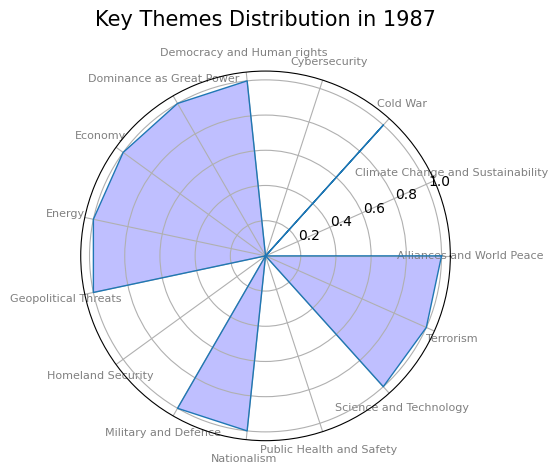

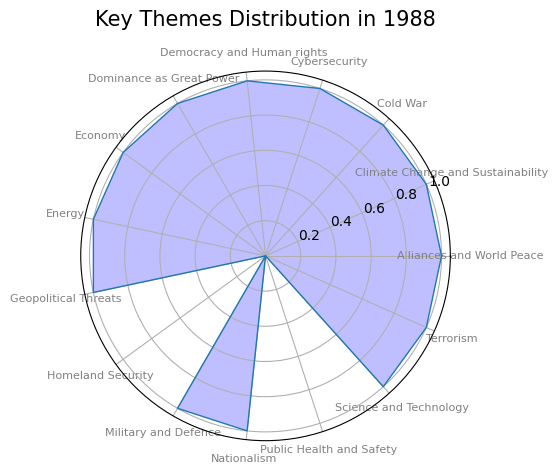

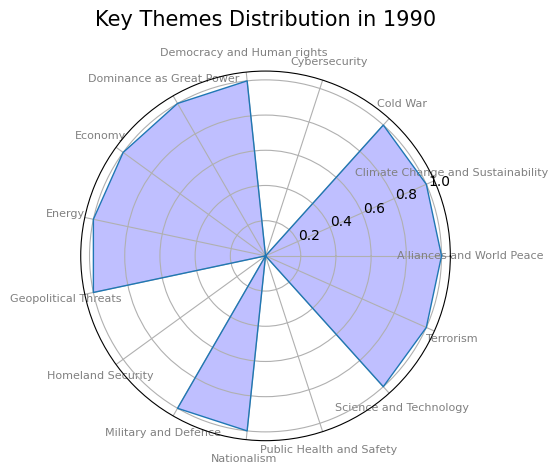

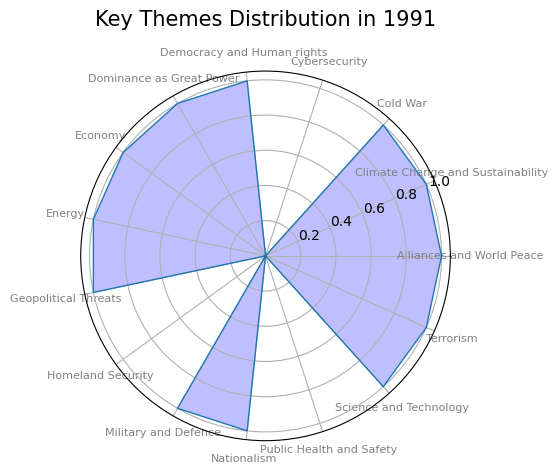

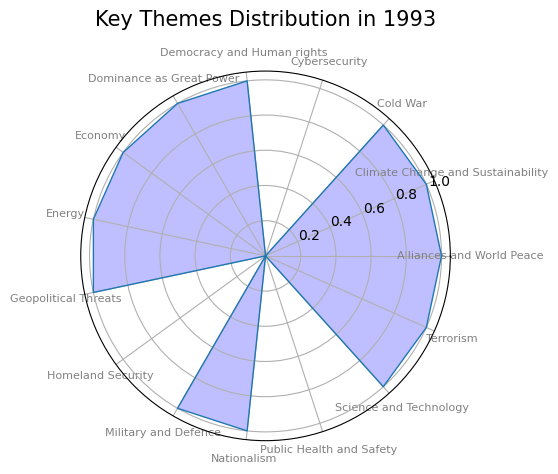

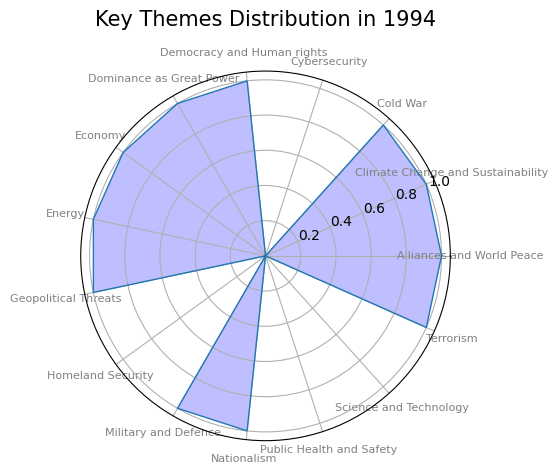

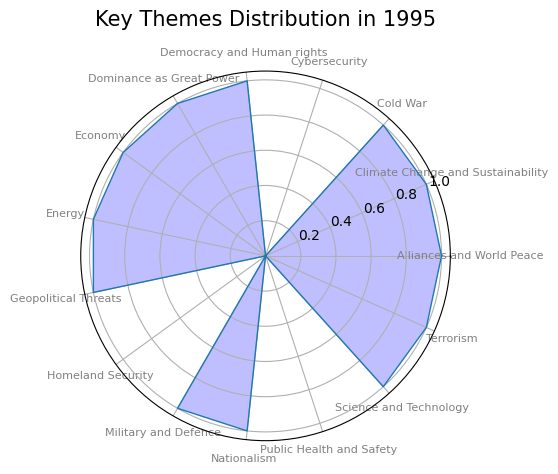

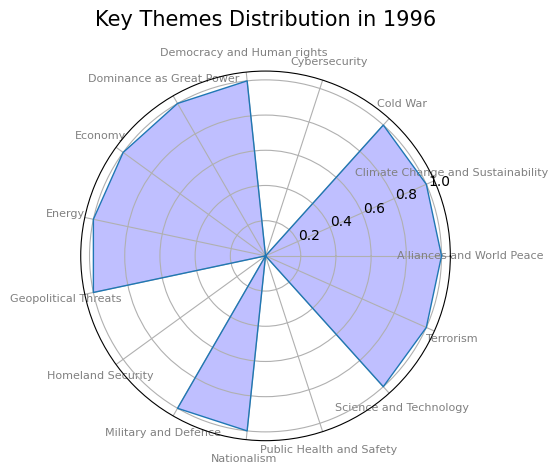

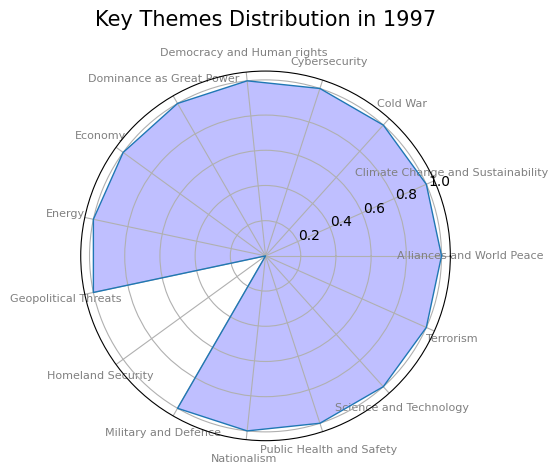

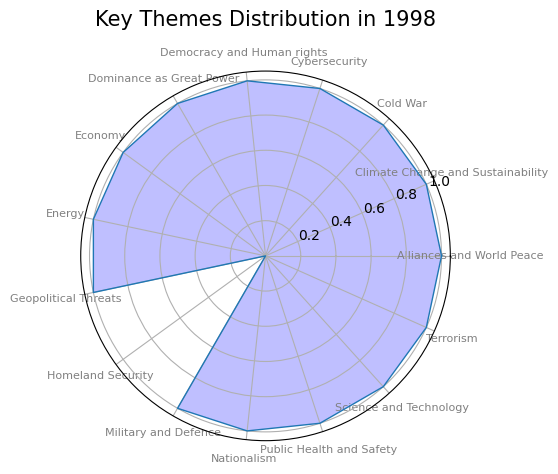

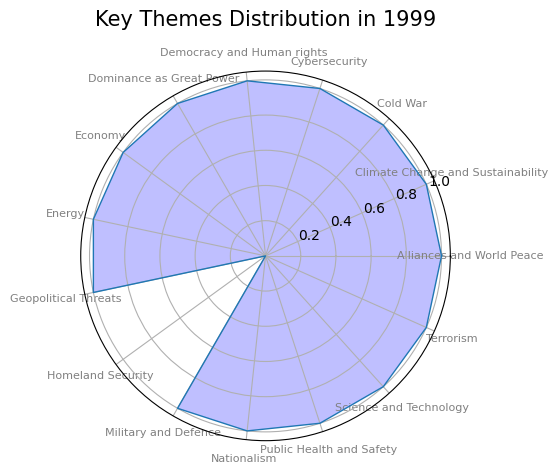

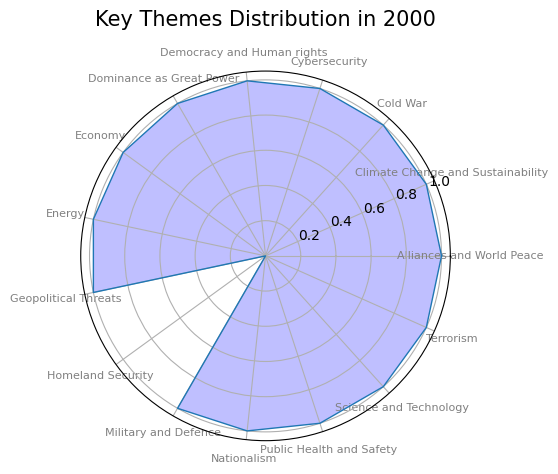

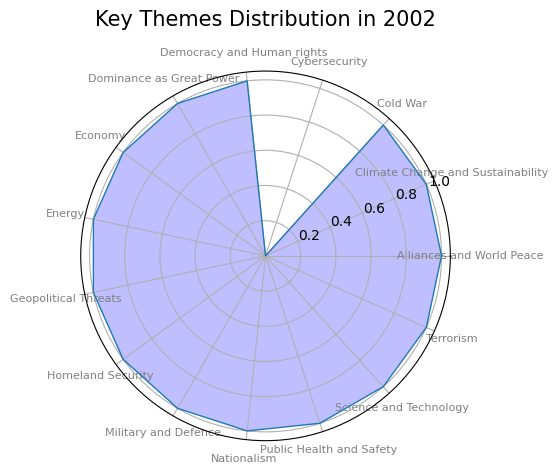

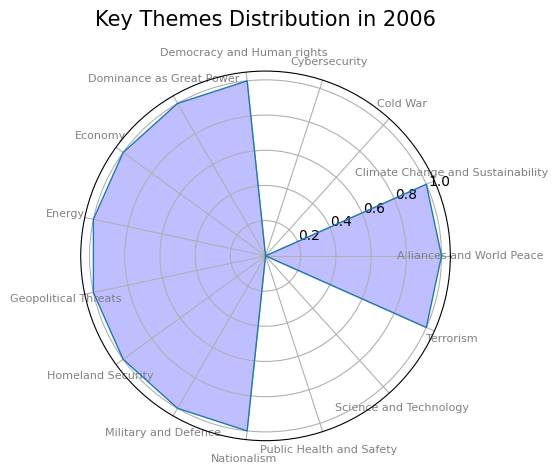

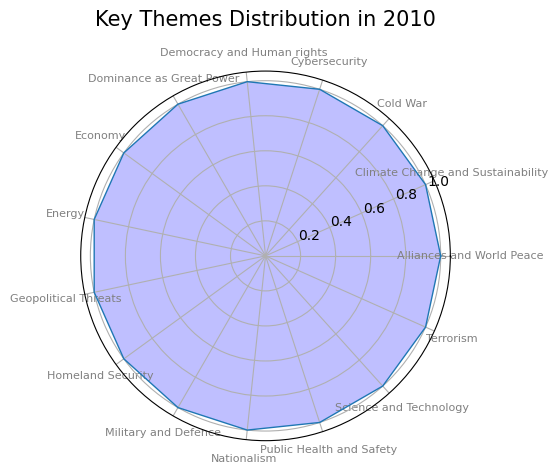

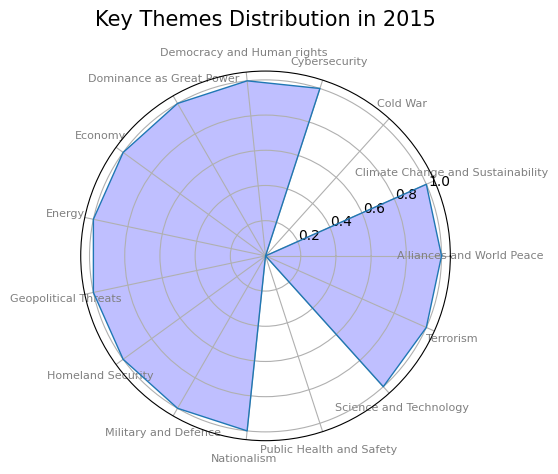

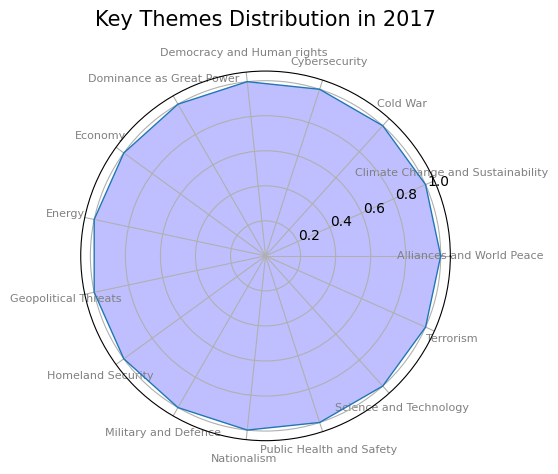

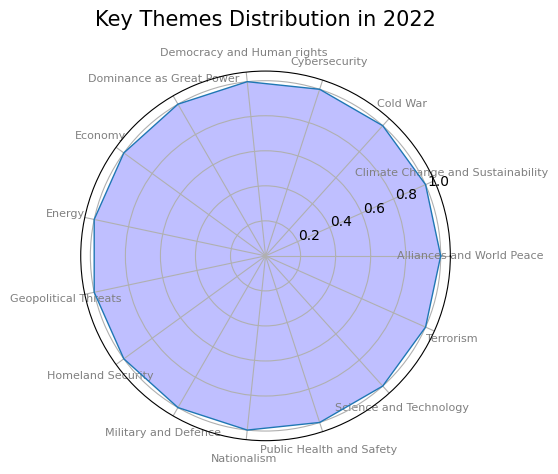

In [10]:
prepare_data_and_plot(df, 'Key Themes')

In [14]:
# Split the 'Key Themes' column and explode it into multiple rows
df_exploded = df.assign(Key_Themes=df['Key Themes'].str.split(', ')).explode('Key_Themes')

# Count the occurrences of each theme per year
theme_counts = df_exploded.groupby(['Year', 'Key_Themes']).size().unstack(fill_value=0)

# Print the transformed DataFrame
theme_counts.head()

Key_Themes  Alliances and World Peace  Climate Change and Sustainability  \
Year                                                                       
1987                                1                                  0   
1988                                1                                  1   
1990                                1                                  1   
1991                                1                                  1   
1993                                1                                  1   

Key_Themes  Cold War  Cybersecurity  Democracy and Human rights  \
Year                                                              
1987               1              0                           1   
1988               1              1                           1   
1990               1              0                           1   
1991               1              0                           1   
1993               1              0                           1   

Key_Themes  Dominance as Great Power  Economy  Energy  Geopolitical Threats  \
Year                                                                          
1987                               1        1       1                     1   
1988                               1        1       1                     1   
1990                               1        1       1                     1   
1991                               1        1       1                     1   
1993                               1        1       1                     1   

Key_Themes  Homeland Security  Military and Defence  Nationalism  \
Year                                                               
1987                        0                     1            1   
1988                        0                     1            1   
1990                        0                     1            1   
1991                        0                     1            1   
1993                        0                     1            1   

Key_Themes  Public Health and Safety  Science and Technology  Terrorism  
Year                                                                     
1987                               0                       1          1  
1988                               0                       1          1  
1990                               0                       1          1  
1991                               0                       1          1  
1993                               0                       1          1

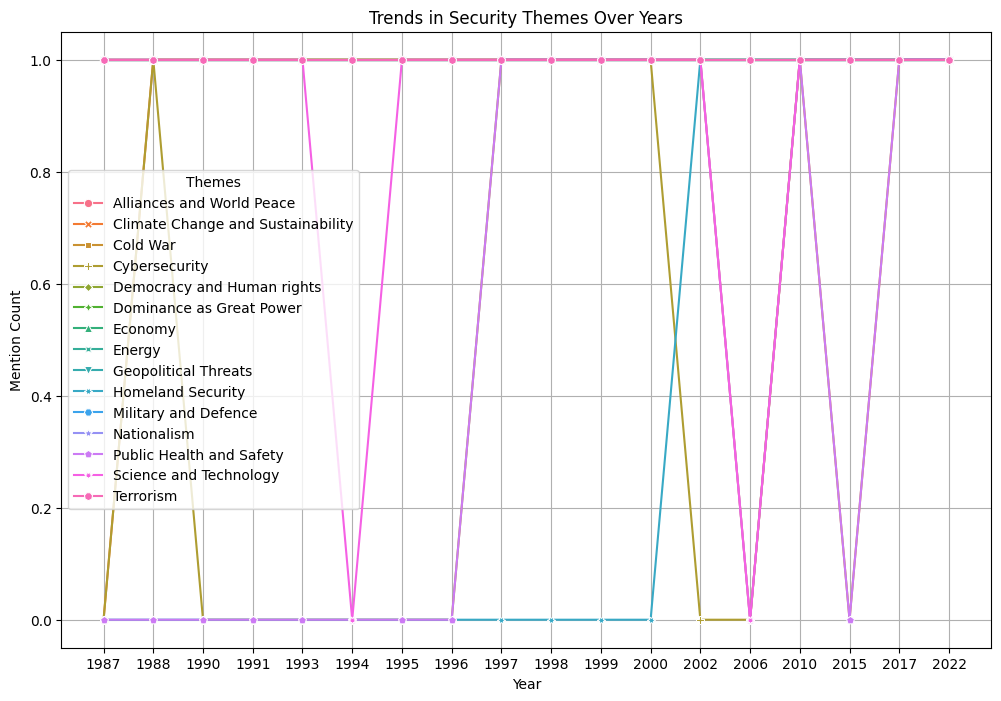

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=theme_counts, markers=True, dashes=False)
plt.title('Trends in Security Themes Over Years')
plt.ylabel('Mention Count')
plt.xlabel('Year')
plt.xticks(theme_counts.index)  # Ensure all years are shown as x-ticks
plt.legend(title='Themes')
plt.grid(True)
plt.show()